<a href="https://colab.research.google.com/github/Leelasai2/Mechine_learing_projects/blob/main/Laptop_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Title:    Laptop Price Prediction for SmartTech Co.
Overview: SmartTech Co. has partnered with our data science team to develop a robust machine learning model that predicts laptop prices accurately.  

# Objectives:
Accurate Pricing: Develop a model that can accurately predict laptop prices based on various features, helping our clients stay competitive in the market.

Market Positioning: Understand how different features contribute to pricing, enabling SmartTech Co. to strategically position its laptops in the market.

Brand Influence: Assess the impact of brand reputation on pricing, providing insights into brand perception and market demand.

# Key Columns:
* Company: Brand of the laptop (e.g., Apple, HP).

* TypeName: Type of the laptop (e.g., Ultrabook, Notebook).

* Inches: Screen size.

* ScreenResolution: Display resolution.

* Cpu: Processor details.

* Ram: Memory size (e.g., 8GB, 16GB).

* Memory: Storage specifications (e.g., SSD, HDD).

* Gpu: Graphics card details.

* OpSys: Operating System (e.g., macOS, No OS).

* Weight: Weight of the laptop.

* Price: Target variable (laptop price).


# Tools:
* CSV
* Python Libraries
* Google Collab

# Project Phases:
1.Data Exploration and Understanding:

In [ ]:
# Importing Libraries
import pandas as pd  # data manipulation and analysis.
import numpy as np   #  efficient numerical computation.
import seaborn as sns  # visualization library based on matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler #data preprocessing


In [ ]:
# Read dataset
data = pd.read_csv("/content/laptop.csv")
data.head(1)

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832


In [ ]:
data = data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1']) # Remove unwanted columns
data.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832


In [ ]:
data['OpSys'].value_counts() #count of each unique value in the 'OpSys' column

,count
OpSys,
Windows 10,1047
No OS,63
Linux,61
Windows 7,45
Chrome OS,27
macOS,13
Mac OS X,8
Windows 10 S,8
Android,1


In [ ]:

print("\nDataset Info:")
print(data.info())                # Checking column names, data types, and non-null counts
print("\nStatistical Summary:")
print(data.describe())            # statistical summary of the dataset


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 112.1+ KB
None

Statistical Summary:
               Price
count    1273.000000
mean    59955.814073
std     37332.251005
min      9270.720000
25%     31914.720000
50%     52161.120000
75%     79333.387200
max    324954.720

In [ ]:
data.isna().sum() #checking null values

,0
Company,30
TypeName,30
Inches,30
ScreenResolution,30
Cpu,30
Ram,30
Memory,30
Gpu,30
OpSys,30
Weight,30


In [ ]:
data.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832


In [ ]:
# Convert numerical columns to appropriate types
data['Inches'] = pd.to_numeric(data['Inches'], errors='coerce') #that converts a Series or DataFrame to numeric values & NAN
data['Ram'] = data['Ram'].astype(str).str.replace('GB', '', regex=False).astype(float)
data['Weight'] = data['Weight'].str.replace('kg', '', regex=False).replace('?', np.nan).astype(float)

# Handle missing values
data.fillna({
    'Company': data['Company'].mode()[0],
    'TypeName': data['TypeName'].mode()[0],
    'ScreenResolution': data['ScreenResolution'].mode()[0],
    'Cpu': data['Cpu'].mode()[0],
    'Memory': data['Memory'].mode()[0],
    'Gpu': data['Gpu'].mode()[0],
    'OpSys': data['OpSys'].mode()[0],
    'Inches': data['Inches'].mean(),
    'Weight': data['Weight'].mean()
}, inplace=True)

# Handle outliers (  cap values beyond a certain percentile)
for col in data.select_dtypes(include=['float', 'int']).columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    # values below lower_bound will be set to lower_bound, and any values above upper_bound will be set to upper_bound.
    data[col] = np.clip(data[col], lower_bound, upper_bound)


In [ ]:
# Checking Null Values
data = data.dropna()
data.isna().sum()

,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0
Weight,0


In [ ]:
data.nunique() #the number of unique values in each column of the DataFrame.

,0
Company,19
TypeName,6
Inches,17
ScreenResolution,40
Cpu,118
Ram,7
Memory,40
Gpu,110
OpSys,9
Weight,156


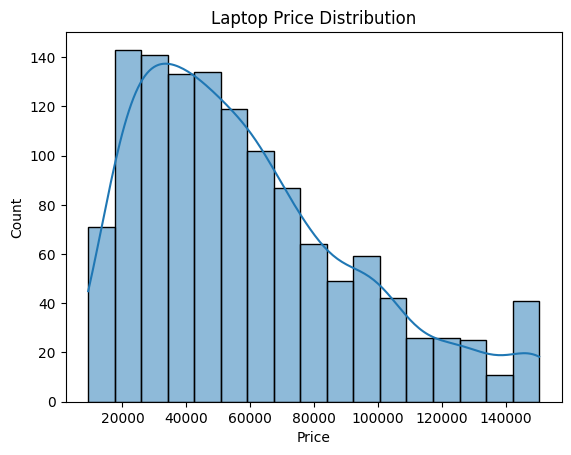

<ipython-input-96-0318c821b1ed>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Company', y='Price', data=data, palette='viridis')


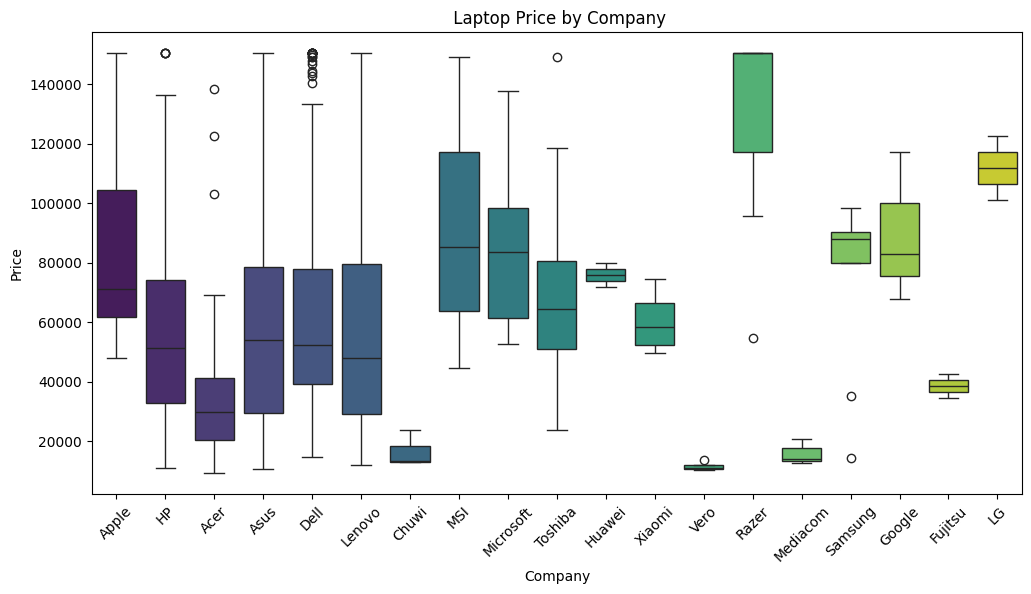

In [ ]:
# Visualize trends in laptop prices and identify potential influential features.

#The histogram shows the distribution of laptop prices in the dataset.
sns.histplot(data['Price'], kde=True)
plt.title('Laptop Price Distribution')
plt.show()

# Relation between company and price
plt.figure(figsize=(12, 6))
sns.boxplot(x='Company', y='Price', data=data, palette='viridis')
plt.title(' Laptop Price by Company')
plt.xlabel('Company')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

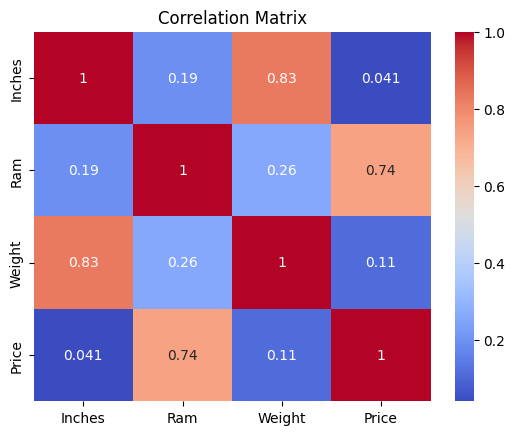

In [ ]:
# corelation between numerical variables
numerical_features = ['Inches','Ram','Weight', 'Price'  ]
correlation_matrix = data[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
data.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832


###  Feature Engineering:

 Extract meaningful features & creating new features for capture the laptop Price

In [ ]:

#Extract meaningful features to enhance model performance

data['Touchscreen'] = data['ScreenResolution'].str.contains('Touchscreen', na=False).astype(int)
data['IPS'] = data['ScreenResolution'].str.contains('IPS Panel', na=False).astype(int)

# Extract resolution components, handling potential errors
import re
data[['X_res', 'Y_res']] = data['ScreenResolution'].str.extract('(\d+)x(\d+)', expand=True).astype(int)
data.drop(columns=['ScreenResolution'], inplace=True) # Only drop 'ScreenResolution'

In [ ]:
def memory(memory):
    if isinstance(memory, str):    # first check if the input memory is a string
        if 'SSD' in memory:
            return 1               # 1 if the memory type is 'SSD'
        elif 'HDD' in memory:
            return 0               # 0 if the memory type is 'HDD'
        else:
            return 0.5
    else:
        return 0.5  # or some other default value

data['New_memory'] = data['Memory'].apply(memory) # Creating new column
data = data.drop(columns=['Memory'])

# Ordered in Asecnding
data.sort_index(axis=1, inplace=True)
data.head(1)

,Company,Cpu,Gpu,IPS,Inches,New_memory,OpSys,Price,Ram,Touchscreen,TypeName,Weight,X_res,Y_res
0,Apple,Intel Core i5 2.3GHz,Intel Iris Plus Graphics 640,1,13.3,1.0,macOS,71378.6832,8.0,0,Ultrabook,1.37,2560,1600


In [ ]:
a = data.iloc[4:5,:]   #the 5th row of the DataFrame
a

,Company,Cpu,Gpu,IPS,Inches,New_memory,OpSys,Price,Ram,Touchscreen,TypeName,Weight,X_res,Y_res
4,Apple,Intel Core i5 3.1GHz,Intel Iris Plus Graphics 650,1,13.3,1.0,macOS,96095.808,8.0,0,Ultrabook,1.37,2560,1600


In [ ]:
#Encode categorical Features

from sklearn.preprocessing import OneHotEncoder, StandardScaler  #importing OneHotEncoder, StandardScaler libraries
categorical_columns = ['Company', 'TypeName', 'Cpu', 'Gpu', 'OpSys']
encoder = OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore')
encoded_features = pd.DataFrame(encoder.fit_transform(data[categorical_columns]), columns=encoder.get_feature_names_out(categorical_columns),index= data.index)

#Reseting the index before Concatenating DataFrames
data =data.reset_index(drop=True)
encoded_features = encoded_features.reset_index(drop=True)
data = pd.concat([data.drop(columns=categorical_columns), encoded_features], axis=1)
data.head(1)

,IPS,Inches,New_memory,Price,Ram,Touchscreen,Weight,X_res,Y_res,Company_Apple,...,Gpu_Nvidia Quadro M620,Gpu_Nvidia Quadro M620M,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
0,1,13.3,1.0,71378.6832,8.0,0,1.37,2560,1600,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Model Development:

Employ machine learning algorithms such as Linear Regression, Random Forest, and Gradient Boosting to predict laptop prices.

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['Price'])
y = data['Price']

# Scalling for fit modeling purpose
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Importing modelling libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [ ]:
# MOdeling
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)


#RandomForest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

#GradientBoosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_predictions))
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

In [ ]:
print("Model Performance:")
print(f'Linear Regression RMSE: {lr_rmse:.2f}, R2= {lr_r2:.2f}')
print(f'Random Forest RMSE: {rf_rmse:.2f},R2 = {rf_r2:.2f}')
print(f'Gradient Boosting RMSE: {gb_rmse:.2f},R2 = {gb_r2:.2f}')

Model Performance:
Linear Regression RMSE: 17602.85, R2= 0.75
Random Forest RMSE: 14754.82,R2 = 0.82
Gradient Boosting RMSE: 15075.79,R2 = 0.82


Model Performance Summary :

Based on both RMSE and R2 metrics, the model performance ranking is:

1. Random Forest (best performance)
2. Gradient Boosting(better performance)
3. Linear Regression (poorest performance)

Recommendations

1. Consider using Random Forest or Gradient Boosting as the final model.
2. Further tuning of hyperparameters may lead to improved performance.


In [ ]:
#Hyperperameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100,200,300],      # Number of trees
    'max_depth': [None, 10, 20],        # Maximum tree depth
    'learning_rate': [0.01, 0.1, 0.2]}
rf_grid =GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error') # evaluate each combination of hyperparameters.
rf_grid.fit(X_train, y_train)
best_params = rf_grid.best_params_     #Retrieving Best Hyperparameters
print("Best Parameters:",best_params)  #the best hyperparameters found during grid search.


Best Parameters: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 100}


In [ ]:
#Randam Forest
rf_model = RandomForestRegressor(n_estimators=100, max_depth=20, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print(f'Random Forest RMSE: {rf_rmse:.2f},R2 = {rf_r2:.2f}')   #14754, R2 = 0.82

Random Forest RMSE: 14747.51,R2 = 0.82


### Real-time Predictions:

Implement a mechanism for the model to make predictions for new laptops entering the market.

In [ ]:
def predict_price(new_data):  #Defines a function predict_price
    categorical_columns = ['Company', 'TypeName', 'Cpu', 'Gpu', 'OpSys']
    new_data_encoded = encoder.transform(new_data[categorical_columns]) #encoder to transform the categorical columns into numerical values.
    feature_names = encoder.get_feature_names_out(categorical_columns)
    encoded_df = pd.DataFrame(new_data_encoded, columns=feature_names)  # Creates a new DataFrame with the encoded categorical columns.
    new_data = pd.concat([new_data.drop(columns=categorical_columns), encoded_df], axis=1)  #Concatenates the original data with the encoded categorical columns.

    # Drop 'Price' column if present. It is the target and not a feature.
    if 'Price' in new_data.columns:
        new_data = new_data.drop(columns=['Price'])
    new_data.columns = new_data.columns.astype(str)  # Convert all column names to strings
    new_data_scaled = scaler.transform(new_data)     # Scales the preprocessed data
    return rf_model.predict(new_data_scaled) # Returns the predicted laptop price using rf_model

b = predict_price(a) #Calls the predict_price function with new data (a)
print("The laptop Price for smart tech co is", b[0].round(2))


The laptop Price for smart tech co is 73290.67


# Expected Outcomes:
* Randam Forest model capable of predicting laptop prices with high accuracy.
* Ram,CPU & Brand factors influencing laptop prices
#### empowering SmartTech Co.  positioning and strategy in market:
 * Develop laptops categaring to specific segments like Students,editors
 * Analyze competitors' pricing strategies and adjust SmartTech Co.'s pricing to maintaining profit margins.
 * To establish a strong brand reputation and attract loyal customers.
